In [1]:
!pip -q install tensorflow==2.3.1 tensorflow-quantum
import cirq
import sympy
import numpy as np
import tensorflow as tf
import tensorflow_quantum as tfq

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
np.random.seed(1234)

     |████████████████████████████████| 320.4MB 47kB/s 
     |████████████████████████████████| 5.9MB 48.6MB/s 
     |████████████████████████████████| 460kB 50.6MB/s 
     |████████████████████████████████| 20.1MB 101kB/s 
     |████████████████████████████████| 1.6MB 57.2MB/s 
     |████████████████████████████████| 5.6MB 58.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pylab as plt 
import skimage
import glob
import h5py   

from pandas import DataFrame, read_csv   
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold 
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from astropy.table import Table 
from PIL import Image  
from skimage import data, io
from skimage.transform import rescale, resize, downscale_local_mean 
from matplotlib import pyplot
from IPython.display import Image 

from matplotlib import pyplot as plt
from scipy.signal import convolve2d 
from sklearn.preprocessing import StandardScaler 
from tensorflow import keras 
from random import randint 

In [ ]:
%cd 


gw_aug = '1tbOPduVlNrKX-D3AALsUOWR9NBuFAQyu'
nd_aug = '1ukwfUxQZQ9zfSfBvZz4h8cj5gkh0gXUL' 

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

gw_augfileName = gw_aug + '.npy'
nd_augfileName = nd_aug + '.npy' 

downloaded = drive.CreateFile({'id': gv})
downloaded.GetContentFile(gvfileName) 

downloaded = drive.CreateFile({'id': ligo})
downloaded.GetContentFile(ligofileName) 

downloaded = drive.CreateFile({'id': phs})
downloaded.GetContentFile(phsfileName)  

downloaded = drive.CreateFile({'id': diagram})
downloaded.GetContentFile(diagramfileName)  

downloaded = drive.CreateFile({'id': gw_aug})
downloaded.GetContentFile(gw_augfileName)  

downloaded = drive.CreateFile({'id': nd_aug})
downloaded.GetContentFile(nd_augfileName)    

/root


In [ ]:
GW = np.load(gw_augfileName) # gravitational wave events
ND = np.load(nd_augfileName) # non gravitational wave events


In [ ]:
GW

array([[[[4.40088061e-01, 6.70719595e-01],
         [8.31678164e-01, 6.92243973e-01],
         [1.18034397e+00, 3.72359693e-01],
         ...,
         [6.94007940e-01, 4.78517085e-01],
         [4.40683666e-01, 1.06523033e+00],
         [2.74037119e-01, 1.88242279e+00]],

        [[4.39855950e-01, 2.48092837e+00],
         [2.67759332e-01, 2.22739754e+00],
         [1.69509949e-01, 1.80244592e+00],
         ...,
         [2.11625151e-01, 6.34982201e-01],
         [2.38124135e-01, 1.25608607e+00],
         [2.79007981e-01, 2.20976719e+00]],

        [[4.08622148e-01, 4.73500725e+00],
         [2.46888576e-01, 4.15423558e+00],
         [1.50639769e-01, 3.41470641e+00],
         ...,
         [1.46259441e-02, 2.25408640e+00],
         [2.65921151e-02, 3.01328437e+00],
         [5.00013329e-02, 3.52147071e+00]],

        ...,

        [[1.20140751e+00, 2.08951706e-01],
         [9.81130872e-01, 3.23213554e-01],
         [6.55807705e-01, 3.62339017e-01],
         ...,
         [2.10170380e

In [ ]:
GW.shape, ND.shape

((1568, 39, 100, 2), (1216, 39, 100, 2))

In [ ]:
def plot_event(event=0, data=GW): 
    fig, ax = plt.subplots(1,2,figsize=(5,5))
    ax[0].imshow(data[event,:,:,0])
    ax[0].set_title('Event {} - H1'.format(event))
    ax[1].imshow(data[event,:,:,1])
    ax[1].set_title('Event {} - L1'.format(event));

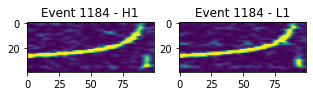

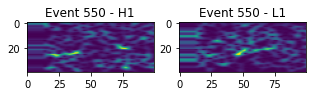

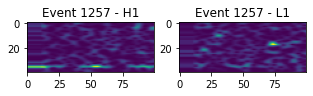

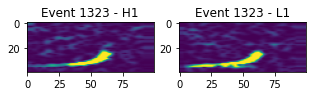

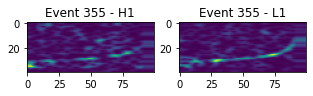

In [ ]:
for e in range(5):
    e = randint(0, GW.shape[0])
    plot_event(e)

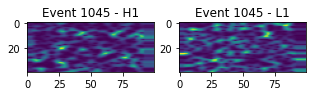

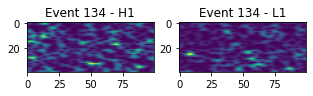

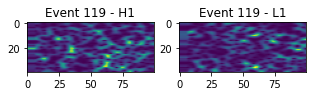

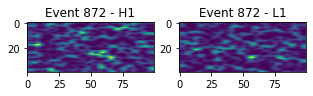

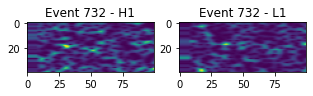

In [ ]:
for e in range(5):
    e = randint(0, ND.shape[0])
    plot_event(e, data=ND) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


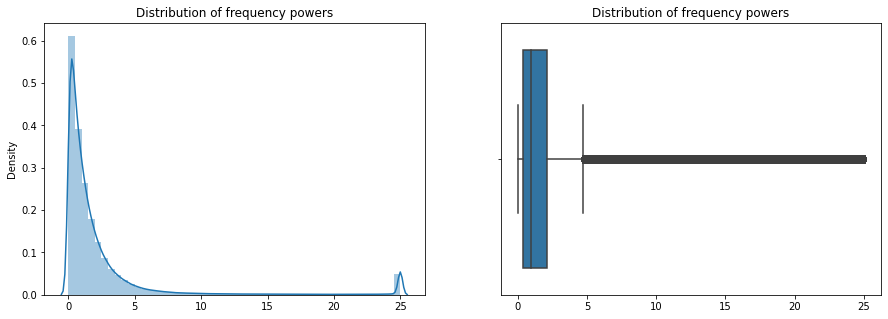

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(GW.flatten(), ax=ax[0])
ax[0].set_title('Distribution of frequency powers')
sns.boxplot(np.unique(GW), ax=ax[1])
ax[1].set_title('Distribution of frequency powers');

In [ ]:
def clean_events(data=GW, threshold=20):
    data_clean = data.copy()
    outliers = np.where(data>threshold)
    outliers_idx = list(zip(outliers[0], outliers[1], outliers[2], outliers[3]))
    return outliers_idx

In [ ]:
clean_events(GW)

[(0, 24, 66, 1),
 (0, 24, 67, 1),
 (0, 24, 68, 1),
 (0, 24, 69, 1),
 (0, 24, 70, 1),
 (0, 24, 71, 1),
 (0, 25, 65, 1),
 (0, 25, 66, 1),
 (0, 25, 67, 1),
 (0, 25, 68, 1),
 (0, 25, 69, 1),
 (0, 25, 70, 1),
 (0, 26, 64, 1),
 (0, 26, 65, 1),
 (0, 26, 66, 1),
 (0, 26, 67, 1),
 (0, 26, 68, 1),
 (0, 26, 69, 1),
 (0, 27, 63, 1),
 (0, 27, 64, 1),
 (0, 27, 65, 1),
 (0, 27, 66, 1),
 (0, 27, 67, 1),
 (0, 27, 68, 1),
 (0, 27, 69, 1),
 (0, 28, 60, 1),
 (0, 28, 61, 1),
 (0, 28, 62, 1),
 (0, 28, 63, 1),
 (0, 28, 64, 1),
 (0, 28, 65, 1),
 (0, 28, 66, 1),
 (0, 28, 67, 1),
 (0, 28, 68, 1),
 (0, 29, 58, 1),
 (0, 29, 59, 1),
 (0, 29, 60, 1),
 (0, 29, 61, 1),
 (0, 29, 62, 1),
 (0, 29, 63, 1),
 (0, 29, 64, 1),
 (0, 29, 65, 1),
 (0, 29, 66, 1),
 (0, 29, 67, 1),
 (0, 30, 55, 1),
 (0, 30, 56, 1),
 (0, 30, 57, 1),
 (0, 30, 58, 1),
 (0, 30, 59, 1),
 (0, 30, 60, 1),
 (0, 30, 61, 1),
 (0, 30, 62, 1),
 (0, 30, 63, 1),
 (0, 30, 64, 1),
 (0, 30, 65, 1),
 (0, 31, 46, 1),
 (0, 31, 47, 1),
 (0, 31, 52, 1),
 (0, 31, 53, 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


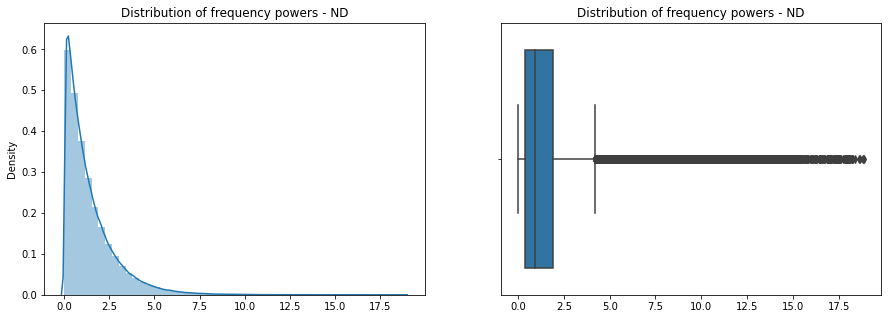

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(ND.flatten(), ax=ax[0])
ax[0].set_title('Distribution of frequency powers - ND')
sns.boxplot(np.unique(ND), ax=ax[1])
ax[1].set_title('Distribution of frequency powers - ND');

In [ ]:
GW = GW.astype('float32')/np.max(GW)
ND = ND.astype('float32')/np.max(ND)
np.random.shuffle(GW)
np.random.shuffle(ND)


In [ ]:
X = np.append(GW, ND, axis=0)
Y = np.append(np.ones((GW.shape[0],1)), np.zeros((ND.shape[0],1)), axis=0)
X.shape, Y.shape, GW.shape, ND.shape


((2784, 39, 100, 2), (2784, 1), (1568, 39, 100, 2), (1216, 39, 100, 2))

In [ ]:
test_idx = np.random.choice(np.arange(0, Y.shape[0], 1), size=round(.2*Y.shape[0]), replace=False)
train_idx = np.setdiff1d(np.arange(0, Y.shape[0], 1), test_idx)
test_idx.shape, train_idx.shape


((557,), (2227,))

In [ ]:
X_train = X[train_idx]
y_train = Y[train_idx]
X_test = X[test_idx]
y_test = Y[test_idx]

In [ ]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape 

((557, 39, 100, 2), (557, 1), (2227, 39, 100, 2), (2227, 1))

In [ ]:
np.unique(y_test) 

array([0., 1.])

# Simple QCNN GW

In [ ]:
X_train= tf.cast(X_train, tf.float32)
X_test=tf.cast(X_test, tf.float32)

X_train = tf.image.resize(X_train[:], (10,10)).numpy()
X_test = tf.image.resize(X_test[:], (10,10)).numpy()

y_train = y_train[:]
y_test = y_test[:]

[1.]


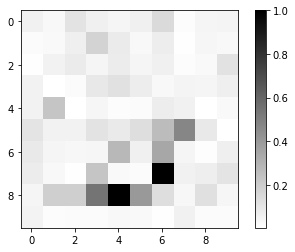

In [ ]:

print(y_train[0])
fig = plt.figure()
plt.imshow(X_train[0, :, :, 0], cmap='gray_r')
plt.colorbar()
fig.savefig('sample', dpi=300)

### Fully Connected Layer Only

In [ ]:
width = np.shape(X_train)[1]
height = np.shape(X_train)[2]

# old
fc_model = tf.keras.Sequential() 
fc_model.add(tf.keras.layers.Flatten(input_shape=(width,height,2)))
# fc_model.add(tf.keras.layers.Flatten(input_shape=X_train.shape[1:]))

fc_model.add(tf.keras.layers.Dense(32, activation='relu'))
fc_model.add(tf.keras.layers.Dense(10, activation='softmax'))
# new
# fc_model = tf.keras.Sequential()
# fc_model.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape=[DATASET_DIM,]))
# fc_model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
# fc_model.add(tf.keras.layers.Dense(1)) 

# fc_model = create_fair_classical_model()
# fc_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
#               metrics=['accuracy'])

fc_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 6,762
Trainable params: 6,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape[1:]

(10, 10, 2)

In [ ]:
opt_rms = tf.keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
fc_model.compile(optimizer=opt_rms,
              loss='binary_crossentropy',
              metrics=['accuracy'])

fc_history = fc_model.fit(X_train, y_train,
                        validation_data=(X_test, y_test), 
                        epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 0s 7ms/step - loss: 1.3420 - accuracy: 0.1127 - val_loss: 1.3523 - val_accuracy: 0.1364
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3408 - accuracy: 0.2205 - val_loss: 1.3519 - val_accuracy: 0.2855
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.2308 - val_loss: 1.3519 - val_accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.1343 - val_loss: 1.3519 - val_accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.0956 - val_loss: 1.3519 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.0777 - val_loss: 1.3519 - val_accuracy: 0.4291
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.1145 - val_loss: 1.3519 - val_accuracy: 0.0000e+00
Epoc

In [ ]:
test_loss, test_acc = fc_model.evaluate(X_test, y_test, verbose=2)

18/18 - 0s - loss: 1.4387 - accuracy: 0.0000e+00


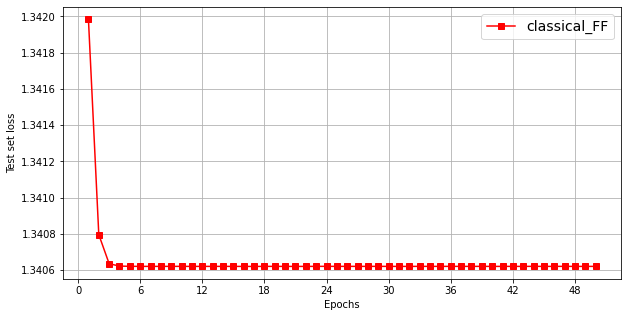

In [ ]:
import matplotlib as mpl
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(fc_history.history['loss'])) + 1, fc_history.history['loss'], "rs-", label="classical_FF")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([0, 50, 0, 2])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)

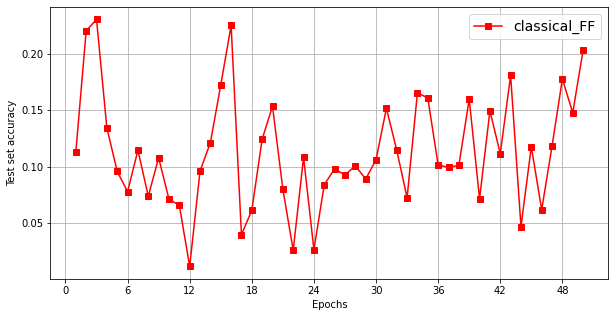

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(fc_history.history['accuracy'])) + 1, fc_history.history['accuracy'], "rs-", label="classical_FF")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)

In [ ]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(8, (2, 2), activation='relu', input_shape=(width, height, 2))) 
# cnn_model.add(tf.keras.layers.Conv2D(8, (2, 2), activation='relu', input_shape=X_train.shape[1:]))
# cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# cnn_model.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu'))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(32, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax')) 

cnn_model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 9, 9, 8)           72        
_________________________________________________________________
flatten_10 (Flatten)         (None, 648)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                20768     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 21,170
Trainable params: 21,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train, y_train,
                        validation_data=(X_test, y_test), 
                        epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 0s 6ms/step - loss: 1.3409 - accuracy: 0.1913 - val_loss: 1.3519 - val_accuracy: 0.0162
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.0099 - val_loss: 1.3519 - val_accuracy: 0.0054
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.0013 - val_loss: 1.3519 - val_accuracy: 0.0018
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.0018 - val_loss: 1.3519 - val_accuracy: 0.0018
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 4.4903e-04 - val_loss: 1.3519 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.0826 - val_loss: 1.3519 - val_accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 4.4903e-04 - val_loss: 1.3519 - val_accuracy: 0.0000e+00


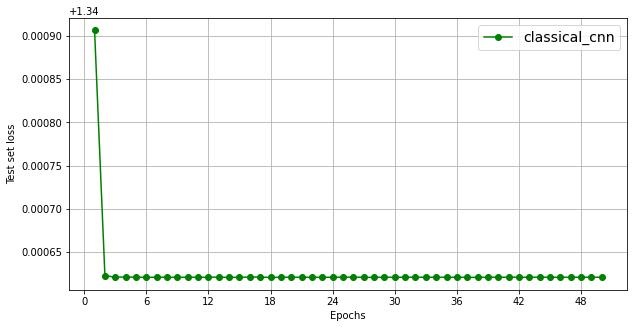

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(cnn_history.history['loss'])) + 1, cnn_history.history['loss'],"go-", label="classical_cnn")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)

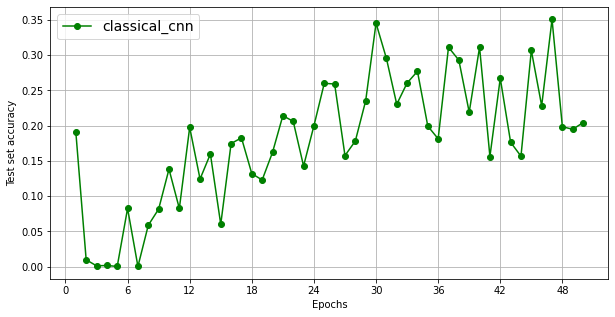

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(cnn_history.history['accuracy'])) + 1, cnn_history.history['accuracy'], "go-", label="classical_cnn")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)

In [ ]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)

18/18 - 0s - loss: 1.3519 - accuracy: 0.5548


### Make Quantum Convolution Layer

In [ ]:
class QConv(tf.keras.layers.Layer):
    def __init__(self, filter_size, depth, activation=None, name=None, kernel_regularizer=None, **kwangs):
        super(QConv, self).__init__(name=name, **kwangs)
        self.filter_size = filter_size
        self.depth = depth
        self.learning_params = []
        self.QCNN_layer_gen()
        # self.circuit_tensor = tfq.convert_to_tensor([self.circuit])
        self.activation = tf.keras.layers.Activation(activation)
        self.kernel_regularizer = kernel_regularizer

    def _next_qubit_set(self, original_size, next_size, qubits):
        step = original_size // next_size
        qubit_list = []
        for i in range(0, original_size, step):
            for j in range(0, original_size, step):
                qubit_list.append(qubits[original_size*i + j])
        return qubit_list

    def _get_new_param(self):
        """
        return new learnable parameter
        all returned parameter saved in self.learning_params
        """
        new_param = sympy.symbols("p"+str(len(self.learning_params)))
        self.learning_params.append(new_param)
        return new_param
    
    def _QConv(self, step, target, qubits):
        """
        apply learnable gates each quantum convolutional layer level
        """
        yield cirq.CZPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])
        yield cirq.CXPowGate(exponent=self._get_new_param())(qubits[target], qubits[target+step])
        
    def QCNN_layer_gen(self):
        """
        make quantum convolutional layer in QConv layer
        """
        pixels = self.filter_size**2
        # filter size: 2^n only for this version!
        if np.log2(pixels) % 1 != 0:
            raise NotImplementedError("filter size: 2^n only available")
        cirq_qubits = cirq.GridQubit.rect(self.filter_size, self.filter_size)
        # mapping input data to circuit
        input_circuit = cirq.Circuit()
        input_params = [sympy.symbols('a%d' %i) for i in range(pixels)]
        for i, qubit in enumerate(cirq_qubits):
            input_circuit.append(cirq.rx(np.pi*input_params[i])(qubit))
        # apply learnable gate set to QCNN circuit
        QCNN_circuit = cirq.Circuit()
        step_size = [2**i for i in range(np.log2(pixels).astype(np.int32))]
        for step in step_size:
            for target in range(0, pixels, 2*step):
                QCNN_circuit.append(self._QConv(step, target, cirq_qubits))
        # merge the circuits
        full_circuit = cirq.Circuit()
        full_circuit.append(input_circuit)
        full_circuit.append(QCNN_circuit)
        self.circuit = full_circuit # save circuit to the QCNN layer obj.
        self.params = input_params + self.learning_params
        self.op = cirq.Z(cirq_qubits[0])
        
    def build(self, input_shape):
        self.width = input_shape[1]
        self.height = input_shape[2]
        self.channel = input_shape[3]
        self.num_x = self.width - self.filter_size + 1
        self.num_y = self.height - self.filter_size + 1
        
        self.kernel = self.add_weight(name="kenel", 
                                      shape=[self.depth, 
                                             self.channel, 
                                             len(self.learning_params)],
                                     initializer=tf.keras.initializers.glorot_normal(),
                                     regularizer=self.kernel_regularizer)
        self.circuit_tensor = tfq.convert_to_tensor([self.circuit] * self.num_x * self.num_y * self.channel)
        
    def call(self, inputs):
        # input shape: [N, width, height, channel]
        # slide and collect data
        stack_set = None
        for i in range(self.num_x):
            for j in range(self.num_y):
                slice_part = tf.slice(inputs, [0, i, j, 0], [-1, self.filter_size, self.filter_size, -1])
                slice_part = tf.reshape(slice_part, shape=[-1, 1, self.filter_size, self.filter_size, self.channel])
                if stack_set == None:
                    stack_set = slice_part
                else:
                    stack_set = tf.concat([stack_set, slice_part], 1)  
        # -> shape: [N, num_x*num_y, filter_size, filter_size, channel]
        stack_set = tf.transpose(stack_set, perm=[0, 1, 4, 2, 3])
        # -> shape: [N, num_x*num_y, channel, filter_size, fiter_size]
        stack_set = tf.reshape(stack_set, shape=[-1, self.filter_size**2])
        # -> shape: [N*num_x*num_y*channel, filter_size^2]
        
        # total input citcuits: N * num_x * num_y * channel
        circuit_inputs = tf.tile([self.circuit_tensor], [tf.shape(inputs)[0], 1])
        circuit_inputs = tf.reshape(circuit_inputs, shape=[-1])
        tf.fill([tf.shape(inputs)[0]*self.num_x*self.num_y, 1], 1)
        outputs = []
        for i in range(self.depth):
            controller = tf.tile(self.kernel[i], [tf.shape(inputs)[0]*self.num_x*self.num_y, 1])
            outputs.append(self.single_depth_QCNN(stack_set, controller, circuit_inputs))
            # shape: [N, num_x, num_y] 
            
        output_tensor = tf.stack(outputs, axis=3)
        output_tensor = tf.math.acos(tf.clip_by_value(output_tensor, -1+1e-5, 1-1e-5)) / np.pi
        # output_tensor = tf.clip_by_value(tf.math.acos(output_tensor)/np.pi, -1, 1)
        return self.activation(output_tensor)
          
    def single_depth_QCNN(self, input_data, controller, circuit_inputs):
        """
        make QCNN for 1 channel only
        """
        # input shape: [N*num_x*num_y*channel, filter_size^2]
        # controller shape: [N*num_x*num_y*channel, len(learning_params)]
        input_data = tf.concat([input_data, controller], 1)
        # input_data shape: [N*num_x*num_y*channel, len(learning_params)]
        QCNN_output = tfq.layers.Expectation()(circuit_inputs, 
                                               symbol_names=self.params,
                                               symbol_values=input_data,
                                               operators=self.op)
        # QCNN_output shape: [N*num_x*num_y*channel]
        QCNN_output = tf.reshape(QCNN_output, shape=[-1, self.num_x, self.num_y, self.channel])
        return tf.math.reduce_sum(QCNN_output, 3)

In [ ]:
qcnn_model = tf.keras.models.Sequential()


qcnn_model.add(QConv(filter_size=2, depth=8, activation='relu', 
                     name='qconv1', input_shape=X_train.shape[1:]))
#model.add(layers.Conv2D(16, (2, 2), activation='relu'))
qcnn_model.add(tf.keras.layers.Flatten())
qcnn_model.add(tf.keras.layers.Dense(32, activation='relu'))
qcnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
qcnn_model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
qconv1 (QConv)               (None, 9, 9, 8)           96        
_________________________________________________________________
flatten_11 (Flatten)         (None, 648)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                20768     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 21,194
Trainable params: 21,194
Non-trainable params: 0
_________________________________________________________________


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


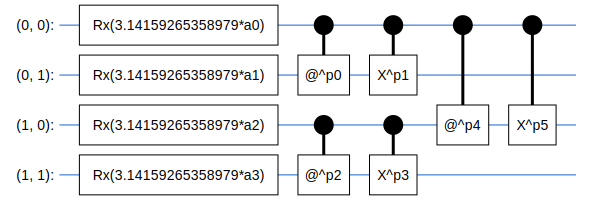

In [ ]:
SVGCircuit(QConv(filter_size=2, depth=0, activation='relu').circuit)

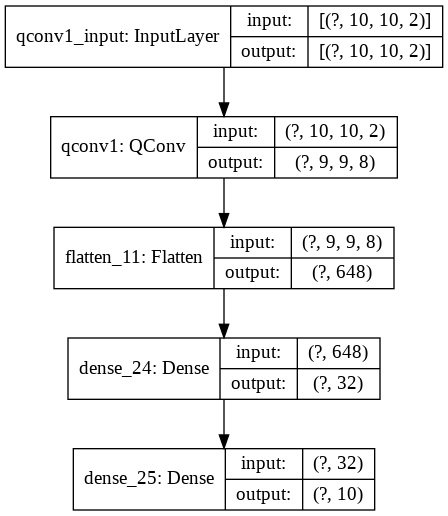

In [ ]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

plot_model(qcnn_model, to_file='model_shapes.png', show_shapes=True)

In [ ]:
qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

qcnn_history = qcnn_model.fit(X_train, y_train,
                        validation_data=(X_test, y_test), 
                        epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 356s 10s/step - loss: 1.7024 - accuracy: 0.5227 - val_loss: 1.3736 - val_accuracy: 0.5673
Epoch 2/50
35/35 [==============================] - 358s 10s/step - loss: 1.2814 - accuracy: 0.5622 - val_loss: 1.1596 - val_accuracy: 0.5673
Epoch 3/50
35/35 [==============================] - 358s 10s/step - loss: 1.0915 - accuracy: 0.5622 - val_loss: 0.9714 - val_accuracy: 0.5709
Epoch 4/50
35/35 [==============================] - 357s 10s/step - loss: 0.9059 - accuracy: 0.8370 - val_loss: 0.7914 - val_accuracy: 0.9013
Epoch 5/50
35/35 [==============================] - 360s 10s/step - loss: 0.7357 - accuracy: 0.8868 - val_loss: 0.6372 - val_accuracy: 0.8995
Epoch 6/50
35/35 [==============================] - 358s 10s/step - loss: 0.5978 - accuracy: 0.8824 - val_loss: 0.5213 - val_accuracy: 0.8905
Epoch 7/50
35/35 [==============================] - 357s 10s/step - loss: 0.4984 - accuracy: 0.8747 - val_loss: 0.4411 - val_accuracy: 0.8869
Epoch 

In [ ]:
test_loss, test_acc = qcnn_model.evaluate(X_test, y_test, verbose=2)

18/18 - 33s - loss: 0.3022 - accuracy: 0.8905


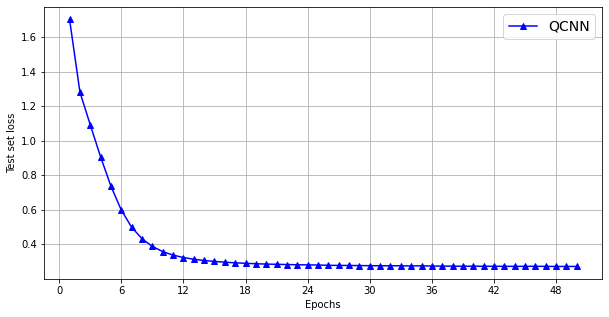

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(qcnn_history.history['loss'])) + 1, qcnn_history.history['loss'],"b^-", label="QCNN")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)

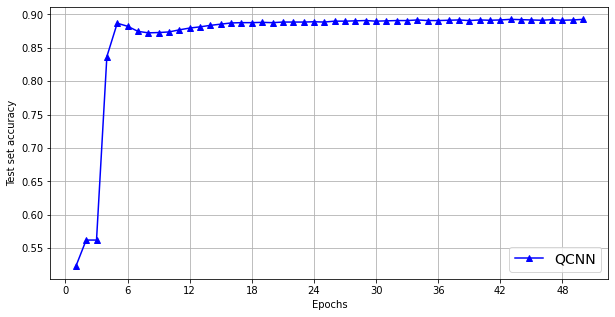

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(qcnn_history.history['accuracy'])) + 1, qcnn_history.history['accuracy'],"b^-", label="QCNN")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)

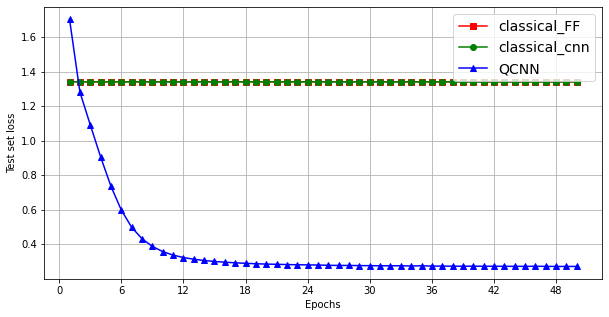

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(fc_history.history['loss'])) + 1, fc_history.history['loss'], "rs-", label="classical_FF") 
plt.plot(np.arange(len(cnn_history.history['loss'])) + 1, cnn_history.history['loss'], "go-", label="classical_cnn")   
plt.plot(np.arange(len(qcnn_history.history['loss'])) + 1, qcnn_history.history['loss'], "b^-", label="QCNN")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)

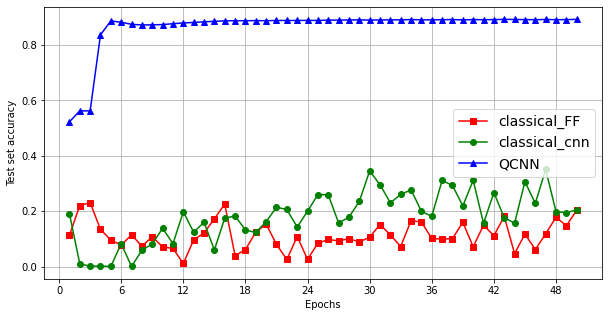

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(fc_history.history['accuracy'])) + 1, fc_history.history['accuracy'], "rs-", label="classical_FF") 
plt.plot(np.arange(len(cnn_history.history['accuracy'])) + 1, cnn_history.history['accuracy'], "go-", label="classical_cnn")   
plt.plot(np.arange(len(qcnn_history.history['accuracy'])) + 1, qcnn_history.history['accuracy'], "b^-", label="QCNN")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
# plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)